# Voting classifier

In [1]:
from cardio_datasets import cardio_100_samples, reduced_dataset
from model_selection_and_evaluation_functions import show_classification_evaluation_metrics, create_X_y_from_data_frame
from sklearn.ensemble import VotingClassifier
import joblib

In [2]:
KNeighborsClassifier_pipeline = joblib.load('./models/pipeline/KNeighborsClassifier_pipeline.joblib')
LinearSVC_pipeline = joblib.load('./models/pipeline/LinearSVC_pipeline.joblib')
LogisticRegression_pipeline = joblib.load('./models/pipeline/LogisticRegression_pipeline.joblib')

In [3]:
X, y = create_X_y_from_data_frame(reduced_dataset, 'cardio')

In [15]:
VotingClassifier_1 = VotingClassifier(
    [
        ("KNeighborsClassifier", KNeighborsClassifier_pipeline),
        ("LogisticRegression", LogisticRegression_pipeline),
    ], voting='soft'
)
VotingClassifier_1.fit(X, y)

VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(leaf_size=2)),
                             ('LogisticRegression',
                              Pipeline(steps=[('PolynomialFeatures',
                                               PolynomialFeatures(degree=6)),
                                              ('MinMaxScaler', MinMaxScaler()),
                                              ('LogisticRegression',
                                               LogisticRegression(l1_ratio=0.22,
                                                                  max_iter=10000,
                                                                  multi_class='ovr',
                                                                  penalty='elasticnet',
                                                                  solver='saga'))]))],
                 voting='soft')

In [16]:
Sample_X, Sample_y = create_X_y_from_data_frame(cardio_100_samples[reduced_dataset.columns], 'cardio')

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        47
           1       0.73      0.68      0.71        53

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



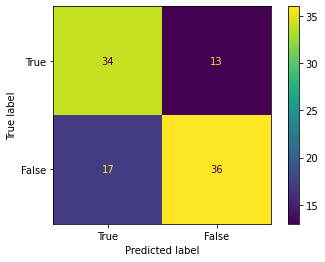

In [17]:
show_classification_evaluation_metrics(VotingClassifier_1, Sample_X, Sample_y)

In [18]:
joblib.dump(VotingClassifier_1, './models/final/VotingClassifier.joblib')

['./models/final/VotingClassifier.joblib']